# 逻辑斯特回归练习

使用学生前两次成绩预测期末成绩
- 数据集1
- 数据集2

## 1. 导入包

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline



## 2.定义几个函数
- 定义数据读取的方法，用np.loadtxt方法
- 定义数据可视化的方法

In [9]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)

    return(data)


定义数据可视化

In [10]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # 获得正负样本的下标(即哪些是正样本，哪些是负样本)
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

## 3.读取数据

首先，调用写好的函数读取本地数据文件

In [11]:
data = loaddata('logisticRegression_data1.txt', ',')

Dimensions:  (100, 3)


将数据的输入变量和目标变量分别读取出来

In [12]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

先看下数据的分布情况

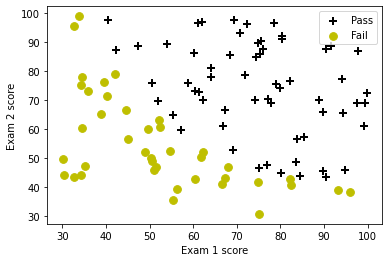

In [13]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Pass', 'Fail')

#### 画决策边界

NameError: name 'sigmoid' is not defined

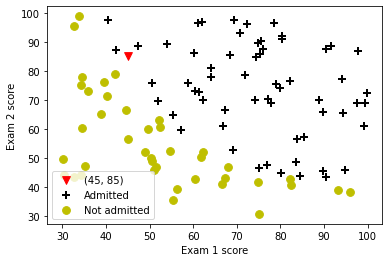

In [14]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

### 加正则化项的逻辑斯特回归

In [15]:
data2 = loaddata('logisticRegression_data2.txt', ',')

OSError: logisticRegression_data2.txt not found.

In [15]:
# 拿到X和y
y = np.c_[data2[:,2]]
X = data2[:,0:2]

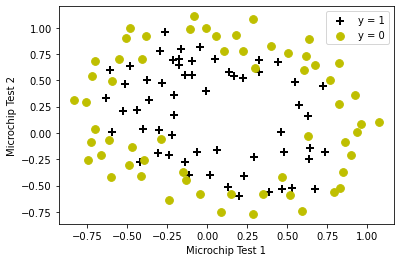

In [16]:
# 画个图
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

####多项式特征出来(最高6阶)

<ipython-input-7-54be42cae3aa>:3: RuntimeWarning: overflow encountered in exp
  return(1 / (1 + np.exp(-z)))


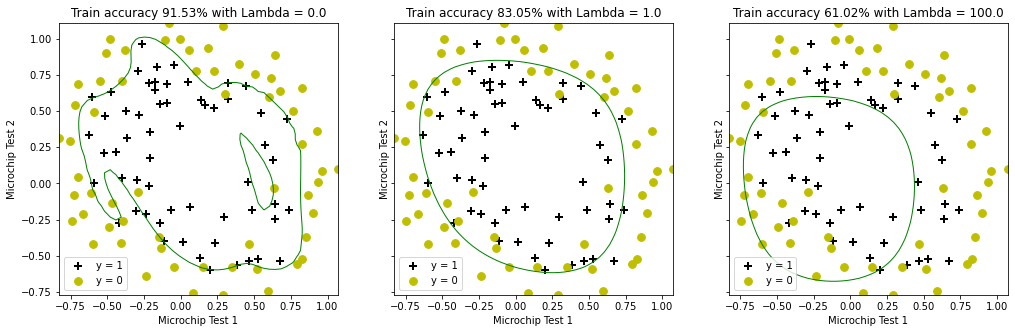

In [22]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# 决策边界，咱们分别来看看正则化系数lambda太大太小分别会出现什么情况
# Lambda = 0 : 就是没有正则化，这样的话，就过拟合咯
# Lambda = 1 : 这才是正确的打开方式
# Lambda = 100 : 卧槽，正则化项太激进，导致基本就没拟合出决策边界

for i, C in enumerate([0.0, 1.0, 100.0]):
    # 最优化 costFunctionReg
  
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), jac=gradientReg, options={'maxiter':3000})
    
    # 准确率
    accuracy = 100.0*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # 对X,y的散列绘图
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # 画出决策边界
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
   
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    
    h = h.reshape(xx1.shape)
 
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

# sklearn实现的logistic
- logistic数据集1
- logistic数据集2

## 逻辑回归数据集1

## 1.导入包

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2.读取数据

In [30]:
data = pd.read_csv('logisticRegression_data1.csv')
X = data.iloc[:,:2]
y = data.iloc[:,-1]
train,test=train_test_split(data,test_size=0.2,stratify=data.iloc[:,-1])
train_x = train.iloc[:,:2]
train_y = train.iloc[:,-1]

test_x = test.iloc[:,:2]
test_y = test.iloc[:,-1]

## 3.模型构建、训练和测试
- (1)使用默认参数构建模型

In [31]:
lr_model = LogisticRegression() #调用模型，但是并未经过任何调参操作，使用默认值
lr_model.fit(train_x,train_y) #训练模型
train_score = lr_model.score(train_x,train_y)
test_score = lr_model.score(test_x,test_y)
print('train_score',train_score) #获取测试集的accuracy
print('test_score',test_score) #获取测试集的accuracy

train_score 0.9125
test_score 0.85


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')#构建模型，使用默认参数
model.fit(train_x, train_y)#训练模型

train_score = model.score(train_x, train_y)#训练集评分
test_score = model.score(test_x, test_y)#测试集评分
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.825000; test score: 0.800000


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# 增加多项式预处理
def polynomial_model(degree=2, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=1,solver='liblinear')

model.fit(train_x, train_y)

train_score = model.score(train_x, train_y)
cv_score = model.score(test_x, test_y)
print('train_score: ', train_score)
print('cv_score: ', cv_score)

train_score:  0.825
cv_score:  0.8


D:\Install\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


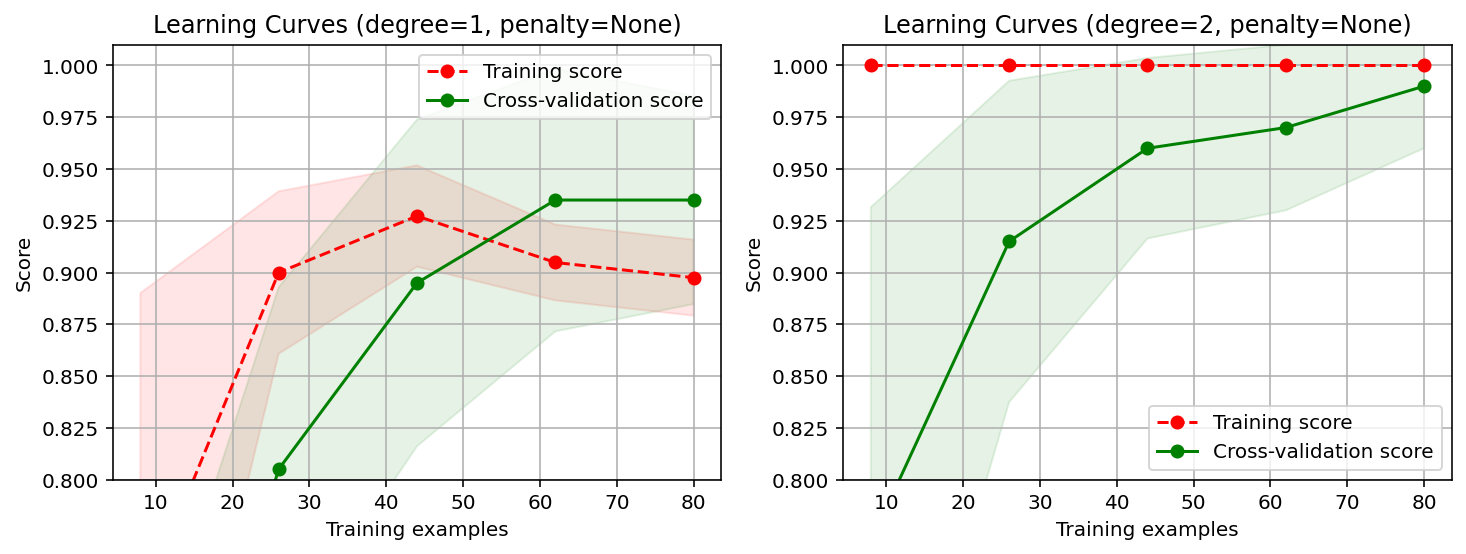

In [41]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l1'

plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, solver='liblinear', max_iter=300), 
                        title.format(degrees[i], None), X, y, ylim=(0.8, 1.01), cv=cv)

## 逻辑回归数据集2

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('student_data.csv')
X = data.iloc[:,:4]
y = data.iloc[:,-1]
train,test=train_test_split(data,test_size=0.2,stratify=data.iloc[:,-1])
train_x = train.iloc[:,:2]
train_y = train.iloc[:,-1]

test_x = test.iloc[:,:2]
test_y = test.iloc[:,-1]

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')#构建模型，使用默认参数
model.fit(train_x, train_y)#训练模型

train_score = model.score(train_x, train_y)#训练集评分
test_score = model.score(test_x, test_y)#测试集评分
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.570000; test score: 0.540000


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# 增加多项式预处理
def polynomial_model(degree=2, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=3, penalty='l1',solver='liblinear')


model.fit(train_x, train_y)

train_score = model.score(train_x, train_y)
cv_score = model.score(test_x, test_y)
print('train_score: ', train_score)
print('cv_score: ', cv_score)

logistic_regression = model.named_steps['logistic_regression']
print('model parameters shape: {0}; count of non-zero element: {1}'.format(
    logistic_regression.coef_.shape, 
    np.count_nonzero(logistic_regression.coef_)))

train_score:  0.65875
cv_score:  0.625
model parameters shape: (1, 9); count of non-zero element: 9


In [28]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [3,5,10]
penalty = 'l1'

plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, solver='liblinear', max_iter=300), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)

ModuleNotFoundError: No module named 'common'